In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

import dask
import glob

In [2]:
########################################################## load the fcnv1_ec_ens ####################################################################################

In [3]:
def load_fcnv1_ec_ens_var(dates, var_name):
    """
    Load a specific variable for specified dates.
    
    Parameters:
        dates (list): List of dates in the format 'YYYYMMDD'.
        var_name (str): Name of the variable to load.
    
    Returns:
        list of xarray.DataArray: List of variables loaded for each date.
    """
    file_template = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/{}_00_backtransformed.nc'
    variables = []
    
    for date in dates:
        file_path = file_template.format(date)
        dataset = xr.open_dataset(file_path)
        dataset = xr.open_dataset(file_path, chunks={'phony_dim_0': 10, 'phony_dim_1':10,'phony_dim_3': 50, 'phony_dim_4': 50})
        # Select variable based on var_name
        if var_name == 't850':
            variable = dataset['forecast'][0:50,:,5,:,:]
        elif var_name == 't500':
            variable = dataset['forecast'][0:50,:,15,:,:]
        elif var_name == 't2m':
            variable = dataset['forecast'][0:50,:,2,:,:]
        elif var_name == 'tcwv':
            variable = dataset['forecast'][0:50,:,19,:,:]
        elif var_name == 'r500':
            variable = dataset['forecast'][0:50,:,17,:,:]
        elif var_name == 'r850':
            variable = dataset['forecast'][0:50,:,18,:,:]
        
        variables.append(variable)
    
    return variables

In [4]:
dates = ['20210616','20210618','20210620','20210622','20210623','20210624']
var_t850 = 't850' 
var_t500 = 't500' 
ds_fcnv1_ec_ens_t850_0616_24= load_fcnv1_ec_ens_var(dates,var_t850)
ds_fcnv1_ec_ens_t500_0616_24 = load_fcnv1_ec_ens_var(dates,var_t500)

In [5]:
dates = ['20210616','20210618','20210620','20210622','20210623','20210624']
var_r850 = 'r850' 
var_r500 = 'r500' 
ds_fcnv1_ec_ens_r850_0616_24= load_fcnv1_ec_ens_var(dates,var_r850)
ds_fcnv1_ec_ens_r500_0616_24 = load_fcnv1_ec_ens_var(dates,var_r500)

In [6]:
dates = ['20210616','20210618','20210620','20210622','20210623','20210624']
var_t2m = 't2m' 

ds_fcnv1_ec_ens_t2m_0616_24 = load_fcnv1_ec_ens_var(dates,var_t2m)

In [7]:
ds_fcnv1_ec_ens_t2m_0616_24

[<xarray.DataArray 'forecast' (phony_dim_0: 50, phony_dim_1: 57,
                               phony_dim_3: 220, phony_dim_4: 480)> Size: 2GB
 dask.array<getitem, shape=(50, 57, 220, 480), dtype=float64, chunksize=(10, 10, 50, 50), chunktype=numpy.ndarray>
 Coordinates:
     phony_dim_2  int64 8B 2
   * phony_dim_0  (phony_dim_0) int64 400B 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
   * phony_dim_1  (phony_dim_1) int64 456B 0 1 2 3 4 5 6 ... 50 51 52 53 54 55 56
   * phony_dim_3  (phony_dim_3) int64 2kB 0 1 2 3 4 5 ... 214 215 216 217 218 219
   * phony_dim_4  (phony_dim_4) int64 4kB 0 1 2 3 4 5 ... 474 475 476 477 478 479,
 <xarray.DataArray 'forecast' (phony_dim_0: 50, phony_dim_1: 57,
                               phony_dim_3: 220, phony_dim_4: 480)> Size: 2GB
 dask.array<getitem, shape=(50, 57, 220, 480), dtype=float64, chunksize=(10, 10, 50, 50), chunktype=numpy.ndarray>
 Coordinates:
     phony_dim_2  int64 8B 2
   * phony_dim_0  (phony_dim_0) int64 400B 0 1 2 3 4 5 6 ... 43 44 45

In [8]:
#####################fcnv1_ec_ens 0616 ####################################################
ds_fcnv1_ec_ens_t850_0616_lanbox = ds_fcnv1_ec_ens_t850_0616_24[0][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0616_lanbox = ds_fcnv1_ec_ens_t500_0616_24[0][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0616_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0616_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0616_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0616_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0616_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0616_lanbox ,ds_fcnv1_ec_ens_t500_0616_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0616_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0616_lanbox_mean ,ds_fcnv1_ec_ens_t500_0616_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [88]:
#####################fcnv1_ec_ens 0618 ####################################################
ds_fcnv1_ec_ens_t850_0618_lanbox = ds_fcnv1_ec_ens_t850_0616_24[1][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0618_lanbox = ds_fcnv1_ec_ens_t500_0616_24[1][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0618_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0618_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0618_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0618_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0618_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0618_lanbox ,ds_fcnv1_ec_ens_t500_0618_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0618_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0618_lanbox_mean ,ds_fcnv1_ec_ens_t500_0618_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [89]:
#####################fcnv1_ec_ens 0620 ####################################################
ds_fcnv1_ec_ens_t850_0620_lanbox = ds_fcnv1_ec_ens_t850_0616_24[2][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0620_lanbox = ds_fcnv1_ec_ens_t500_0616_24[2][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0620_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0620_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0620_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0620_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0620_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0620_lanbox ,ds_fcnv1_ec_ens_t500_0620_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0620_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0620_lanbox_mean ,ds_fcnv1_ec_ens_t500_0620_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [90]:
#####################fcnv1_ec_ens 0622 ####################################################
ds_fcnv1_ec_ens_t850_0622_lanbox = ds_fcnv1_ec_ens_t850_0616_24[3][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0622_lanbox = ds_fcnv1_ec_ens_t500_0616_24[3][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0622_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0622_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0622_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0622_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0622_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0622_lanbox ,ds_fcnv1_ec_ens_t500_0622_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0622_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0622_lanbox_mean ,ds_fcnv1_ec_ens_t500_0622_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [91]:
#####################fcnv1_ec_ens 0623 ####################################################
ds_fcnv1_ec_ens_t850_0623_lanbox = ds_fcnv1_ec_ens_t850_0616_24[4][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0623_lanbox = ds_fcnv1_ec_ens_t500_0616_24[4][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0623_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0623_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0623_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0623_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0623_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0623_lanbox ,ds_fcnv1_ec_ens_t500_0623_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0623_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0623_lanbox_mean ,ds_fcnv1_ec_ens_t500_0623_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [11]:
#####################fcnv1_ec_ens 0624 ####################################################
ds_fcnv1_ec_ens_t850_0624_lanbox = ds_fcnv1_ec_ens_t850_0616_24[5][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_t500_0624_lanbox = ds_fcnv1_ec_ens_t500_0616_24[5][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_t850_0624_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t850_0624_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_t500_0624_lanbox_mean = np.mean(ds_fcnv1_ec_ens_t500_0624_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_t850_500_0624_lanbox = xr.concat([ds_fcnv1_ec_ens_t850_0624_lanbox ,ds_fcnv1_ec_ens_t500_0624_lanbox], dim="plev")
ds_fcnv1_ec_ens_t850_500_0624_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_t850_0624_lanbox_mean ,ds_fcnv1_ec_ens_t500_0624_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [ ]:
#####################fcnv1_ec_ens t2m ####################################################

In [42]:
# box 61:141,194:274
ds_fcnv1_ec_ens_t2m_0616_box = ds_fcnv1_ec_ens_t2m_0616_23[0][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0616_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0616_box,axis=(-1,-2))

In [43]:
ds_fcnv1_ec_ens_t2m_0618_box = ds_fcnv1_ec_ens_t2m_0616_23[1][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0618_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0618_box,axis=(-1,-2))

In [44]:
ds_fcnv1_ec_ens_t2m_0620_box = ds_fcnv1_ec_ens_t2m_0616_23[2][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0620_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0620_box,axis=(-1,-2))

In [45]:
ds_fcnv1_ec_ens_t2m_0622_box = ds_fcnv1_ec_ens_t2m_0616_23[3][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0622_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0622_box,axis=(-1,-2))

In [46]:
ds_fcnv1_ec_ens_t2m_0623_box = ds_fcnv1_ec_ens_t2m_0616_23[4][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0623_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0623_box,axis=(-1,-2))

In [148]:
ds_fcnv1_ec_ens_t2m_0624_box = ds_fcnv1_ec_ens_t2m_0616_24[5][:,:,142:61:-1,194:275]
#ds_fcnv1_ec_ens_t2m_0623_box_mean = np.mean(ds_fcnv1_ec_ens_t2m_0623_box,axis=(-1,-2))

In [ ]:
######################### ######################################fcnv1_ec_ens r500 r850 ##############################

In [83]:
#####################fcnv1_ec_ens 0618 ####################################################
ds_fcnv1_ec_ens_r850_0618_lanbox = ds_fcnv1_ec_ens_r850_0616_24[1][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_r500_0618_lanbox = ds_fcnv1_ec_ens_r500_0616_24[1][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_r850_0618_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r850_0618_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_r500_0618_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r500_0618_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_r850_500_0618_lanbox = xr.concat([ds_fcnv1_ec_ens_r850_0618_lanbox ,ds_fcnv1_ec_ens_r500_0618_lanbox], dim="plev")
ds_fcnv1_ec_ens_r850_500_0618_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_r850_0618_lanbox_mean ,ds_fcnv1_ec_ens_r500_0618_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [84]:
#####################fcnv1_ec_ens 0620 ####################################################
ds_fcnv1_ec_ens_r850_0620_lanbox = ds_fcnv1_ec_ens_r850_0616_24[2][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_r500_0620_lanbox = ds_fcnv1_ec_ens_r500_0616_24[2][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_r850_0620_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r850_0620_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_r500_0620_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r500_0620_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_r850_500_0620_lanbox = xr.concat([ds_fcnv1_ec_ens_r850_0620_lanbox ,ds_fcnv1_ec_ens_r500_0620_lanbox], dim="plev")
ds_fcnv1_ec_ens_r850_500_0620_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_r850_0620_lanbox_mean ,ds_fcnv1_ec_ens_r500_0620_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [85]:
#####################fcnv1_ec_ens 0622 ####################################################
ds_fcnv1_ec_ens_r850_0622_lanbox = ds_fcnv1_ec_ens_r850_0616_24[3][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_r500_0622_lanbox = ds_fcnv1_ec_ens_r500_0616_24[3][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_r850_0622_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r850_0622_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_r500_0622_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r500_0622_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_r850_500_0622_lanbox = xr.concat([ds_fcnv1_ec_ens_r850_0622_lanbox ,ds_fcnv1_ec_ens_r500_0622_lanbox], dim="plev")
ds_fcnv1_ec_ens_r850_500_0622_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_r850_0622_lanbox_mean ,ds_fcnv1_ec_ens_r500_0622_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [12]:
#####################fcnv1_ec_ens 0624 ####################################################
ds_fcnv1_ec_ens_r850_0624_lanbox = ds_fcnv1_ec_ens_r850_0616_24[5][:,:,124:83:-1,220:261]
ds_fcnv1_ec_ens_r500_0624_lanbox = ds_fcnv1_ec_ens_r500_0616_24[5][:,:,124:83:-1,220:261]

ds_fcnv1_ec_ens_r850_0624_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r850_0624_lanbox,axis=(-1,-2))
ds_fcnv1_ec_ens_r500_0624_lanbox_mean = np.mean(ds_fcnv1_ec_ens_r500_0624_lanbox,axis=(-1,-2))

ds_fcnv1_ec_ens_r850_500_0624_lanbox = xr.concat([ds_fcnv1_ec_ens_r850_0624_lanbox ,ds_fcnv1_ec_ens_r500_0624_lanbox], dim="plev")
ds_fcnv1_ec_ens_r850_500_0624_lanbox_mean = xr.concat([ds_fcnv1_ec_ens_r850_0624_lanbox_mean ,ds_fcnv1_ec_ens_r500_0624_lanbox_mean], dim="plev")

#anom_fcnv1_ec_ens_t850_500_0616_lanbox_mean = ds_fcnv1_ec_cf_t850_500_0616_lanbox_mean - ds_clim_T_L9_mean.isel(plev=[8,5])

In [ ]:
################################################ compute the specifc humidity  ##################################################################################################

In [13]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units

In [14]:
fcnv1_plevs=[850,500]
fcnv1_plevs = np.reshape(fcnv1_plevs, (2,1,1,1,1))

In [15]:
######################  0624 Q##########################################
ds_fcnv1_ec_ens_dp_850_500_0624_lanbox =  dewpoint_from_relative_humidity((ds_fcnv1_ec_ens_t850_500_0624_lanbox  -273.15) * units.degC, ds_fcnv1_ec_ens_r850_500_0624_lanbox  * units.percent)

In [16]:
ds_fcnv1_ec_ens_sh_850_500_0624_lanbox = specific_humidity_from_dewpoint((fcnv1_plevs) * units.hPa,ds_fcnv1_ec_ens_dp_850_500_0624_lanbox)

ds_fcnv1_ec_ens_sh_850_500_0624_lanbox_mean = np.mean(ds_fcnv1_ec_ens_sh_850_500_0624_lanbox,axis=(-1,-2))

In [17]:
%store ds_fcnv1_ec_ens_sh_850_500_0624_lanbox_mean

Stored 'ds_fcnv1_ec_ens_sh_850_500_0624_lanbox_mean' (DataArray)


In [ ]:
############## 0622 Q ###################################################

In [102]:
ds_fcnv1_ec_ens_dp_850_500_0622_lanbox =  dewpoint_from_relative_humidity((ds_fcnv1_ec_ens_t850_500_0622_lanbox  -273.15) * units.degC, ds_fcnv1_ec_ens_r850_500_0622_lanbox  * units.percent)

In [114]:
ds_fcnv1_ec_ens_sh_850_500_0622_lanbox = specific_humidity_from_dewpoint((fcnv1_plevs) * units.hPa,ds_fcnv1_ec_ens_dp_850_500_0622_lanbox)

ds_fcnv1_ec_ens_sh_850_500_0622_lanbox_mean = np.mean(ds_fcnv1_ec_ens_sh_850_500_0622_lanbox,axis=(-1,-2))

In [115]:
%store ds_fcnv1_ec_ens_sh_850_500_0622_lanbox_mean

Stored 'ds_fcnv1_ec_ens_sh_850_500_0622_lanbox_mean' (DataArray)


In [ ]:
############### 0620 Q #######################################################

In [105]:
ds_fcnv1_ec_ens_dp_850_500_0620_lanbox =  dewpoint_from_relative_humidity((ds_fcnv1_ec_ens_t850_500_0620_lanbox  -273.15) * units.degC, ds_fcnv1_ec_ens_r850_500_0620_lanbox  * units.percent)

/scratch/slurm_tmpdir/job_23609826/ipykernel_859951/1823997121.py:1: UserWarning: Relative humidity >120%, ensure proper units.
  ds_fcnv1_ec_ens_dp_850_500_0620_lanbox =  dewpoint_from_relative_humidity((ds_fcnv1_ec_ens_t850_500_0620_lanbox  -273.15) * units.degC, ds_fcnv1_ec_ens_r850_500_0620_lanbox  * units.percent)


In [106]:
ds_fcnv1_ec_ens_sh_850_500_0620_lanbox = specific_humidity_from_dewpoint((fcnv1_plevs) * units.hPa,ds_fcnv1_ec_ens_dp_850_500_0620_lanbox)

ds_fcnv1_ec_ens_sh_850_500_0620_lanbox_mean = np.mean(ds_fcnv1_ec_ens_sh_850_500_0620_lanbox,axis=(-1,-2))

In [107]:
%store ds_fcnv1_ec_ens_sh_850_500_0620_lanbox_mean

Stored 'ds_fcnv1_ec_ens_sh_850_500_0620_lanbox_mean' (DataArray)


In [108]:
############### 0618 Q ############################################################

In [109]:
ds_fcnv1_ec_ens_dp_850_500_0618_lanbox =  dewpoint_from_relative_humidity((ds_fcnv1_ec_ens_t850_500_0618_lanbox  -273.15) * units.degC, ds_fcnv1_ec_ens_r850_500_0618_lanbox  * units.percent)

In [110]:
ds_fcnv1_ec_ens_sh_850_500_0618_lanbox = specific_humidity_from_dewpoint((fcnv1_plevs) * units.hPa,ds_fcnv1_ec_ens_dp_850_500_0618_lanbox)

ds_fcnv1_ec_ens_sh_850_500_0618_lanbox_mean = np.mean(ds_fcnv1_ec_ens_sh_850_500_0618_lanbox,axis=(-1,-2))

In [111]:
%store ds_fcnv1_ec_ens_sh_850_500_0618_lanbox_mean

Stored 'ds_fcnv1_ec_ens_sh_850_500_0618_lanbox_mean' (DataArray)


In [ ]:
%store ds_fcnv1_ec_ens_sh_850_500_0622_lanbox_mean

In [3]:
%store -r ds_fcnv1_ec_ens_t2m_0616_box
%store -r ds_fcnv1_ec_ens_t2m_0618_box
%store -r ds_fcnv1_ec_ens_t2m_0620_box
%store -r ds_fcnv1_ec_ens_t2m_0622_box
%store -r ds_fcnv1_ec_ens_t2m_0623_box

In [4]:
%store -r ds_fcnv1_ec_ens_t2m_0624_box

In [5]:
%store -r ds_fcnv1_ec_ens_t850_500_0616_lanbox_mean
%store -r ds_fcnv1_ec_ens_t850_500_0618_lanbox_mean
%store -r ds_fcnv1_ec_ens_t850_500_0620_lanbox_mean
%store -r ds_fcnv1_ec_ens_t850_500_0622_lanbox_mean
%store -r ds_fcnv1_ec_ens_t850_500_0623_lanbox_mean

In [6]:
%store -r ds_fcnv1_ec_ens_t850_500_0624_lanbox_mean

In [ ]:
%store -r ds_fcnv1_ec_ens_r850_500_0616_lanbox_mean
%store -r ds_fcnv1_ec_ens_r850_500_0618_lanbox_mean
%store -r ds_fcnv1_ec_ens_r850_500_0620_lanbox_mean
%store -r ds_fcnv1_ec_ens_r850_500_0622_lanbox_mean
%store -r ds_fcnv1_ec_ens_r850_500_0623_lanbox_mean

In [6]:
%store -r ds_fcnv1_ec_ens_sh_850_500_0618_lanbox_mean
%store -r ds_fcnv1_ec_ens_sh_850_500_0620_lanbox_mean
%store -r ds_fcnv1_ec_ens_sh_850_500_0622_lanbox_mean
%store -r ds_fcnv1_ec_ens_sh_850_500_0624_lanbox_mean

In [ ]:
########################################################load climatology ##############################################################################################

In [7]:
levels = [10000, 20000,25000,30000,40000,50000,60000,70000,80000,85000,90000]
base_pattern = '/home/kit/imktro/gj5173/tmp/clim_T{level}_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point'
datasets = []

for level in levels:
    filename = base_pattern.format(level=level)  
    ds = xr.open_dataset(filename,engine='netcdf4')
    datasets.append(ds)

ds_clim_T_100_900 = xr.concat(datasets, dim='plev')

In [18]:
ds_clim_T_100_900

<xarray.Dataset> Size: 1MB
Dimensions:  (plev: 11, lat: 110, lon: 240)
Coordinates:
  * lon      (lon) float32 960B -180.0 -179.5 -179.0 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 440B 25.0 25.5 26.0 26.5 27.0 ... 78.0 78.5 79.0 79.5
  * plev     (plev) float64 88B 1e+04 2e+04 2.5e+04 ... 8e+04 8.5e+04 9e+04
Data variables:
    T        (plev, lat, lon) float32 1MB 203.0 203.1 203.1 ... 273.9 273.9

In [8]:
ds_clim_T_L2_landbox = ds_clim_T_100_900.isel(plev=[5,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_T_L2_lanbox_mean = np.mean(ds_clim_T_L2_landbox.T,axis=(-1,-2))

In [9]:
ds_clim_T_L9_landbox = ds_clim_T_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_T_L9_mean = np.mean(ds_clim_T_L9_landbox.T,axis=(-1,-2))

In [10]:
ds_fcnv1_ec_ens_t850_500_0616_lanbox_mean

<xarray.DataArray 'forecast' (plev: 2, phony_dim_0: 50, phony_dim_1: 57)> Size: 46kB
array([[[274.94800415, 280.28141073, 278.3204703 , ..., 283.48627418,
         284.54871433, 286.27358791],
        [274.94800415, 280.84766089, 278.84370338, ..., 286.97870245,
         287.81755497, 290.01040279],
        [274.94800415, 280.58109277, 278.41680037, ..., 283.73016443,
         284.16124987, 285.30992146],
        ...,
        [274.94800415, 280.56225757, 278.47362126, ..., 287.22052763,
         287.02765102, 288.299824  ],
        [274.94800415, 280.09938982, 278.13775245, ..., 282.88226708,
         284.3508808 , 287.4509788 ],
        [274.94800415, 279.82204781, 278.08417597, ..., 283.57767996,
         283.51169551, 284.20943293]],

       [[202.86824341, 252.83822777, 252.43032657, ..., 254.73692079,
         254.85546346, 255.50539233],
        [202.86824341, 253.33653516, 252.74068461, ..., 259.87894028,
         259.95002714, 260.38670056],
        [202.86824341, 253.13474555, 252.57415642, ..., 256.8550533 ,
         256.81463075, 257.26986423],
        ...,
        [202.86824341, 253.23870608, 252.51831415, ..., 258.85104632,
         258.28383785, 257.92625955],
        [202.86824341, 252.9073676 , 252.19352892, ..., 257.83019291,
         258.02115275, 258.12306214],
        [202.86824341, 252.95843478, 252.4113119 , ..., 257.00983908,
         256.85811498, 257.2332375 ]]])
Coordinates:
    phony_dim_2  (plev) int64 16B 5 15
  * phony_dim_0  (phony_dim_0) int64 400B 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
  * phony_dim_1  (phony_dim_1) int64 456B 0 1 2 3 4 5 6 ... 50 51 52 53 54 55 56
Dimensions without coordinates: plev

In [19]:
############################################################### load era5 #####################################################################################################################

In [11]:
ds_era5_JJ = xr.open_dataset('/home/kit/imktro/gj5173/ai-models/data/era5_2021-JJ.nc')
ds_era5_JJ_T = ds_era5_JJ['var130']

ds_era5_JJ_T_landbox = ds_era5_JJ_T[:,:,164:123:-1,940:981] #area from 49N-59N,115W-125W
ds_era5_0624_0701_t_landbox = ds_era5_JJ_T_landbox.isel(plev=[ 7, 10],time=slice(10,18))
ds_era5_0624_0701_t_landbox_mean = np.mean(ds_era5_0624_0701_t_landbox,axis=(-1,-2))


In [21]:
########################################################### anomaly calculation ############################################################################################################

In [136]:
ds_anom_fcnv1_ec_ens_L2_0616_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0616_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean
ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0618_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean
ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0620_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean
ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0622_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean
ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0623_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean

In [139]:
ds_anom_fcnv1_ec_ens_L2_0624_lanbox_mean = ds_fcnv1_ec_ens_t850_500_0624_lanbox_mean[::-1, :, :] - ds_clim_T_L2_lanbox_mean

In [140]:
ds_anom_era5_L2_lanbox_mean = ds_era5_0624_0701_t_landbox_mean - ds_clim_T_L2_lanbox_mean

In [11]:
########################################################## the time array choose ################################################################################################

In [15]:
########################### time array of 0616 #################################################
start_date_0616 = "2021-06-16 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0616 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0616, periods=57, freq="6H")})

In [16]:
########################### time array of 0618 #################################################
start_date_0618 = "2021-06-18 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0618 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0618, periods=57, freq="6H")})

In [17]:
########################### time array of 0620 #################################################
start_date_0620 = "2021-06-20 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0620 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0620, periods=57, freq="6H")})

In [18]:
########################### time array of 0622 #################################################
start_date_0622 = "2021-06-22 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0622 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0622, periods=57, freq="6H")})

In [19]:
########################### time array of 0622 #################################################
start_date_0623 = "2021-06-23 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0623 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0623, periods=57, freq="6H")})

In [21]:
########################### time array of 0622 #################################################
start_date_0624 = "2021-06-24 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 57 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array_0624 = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date_0624, periods=57, freq="6H")})

In [49]:
#check the time index from 0624 in the fcnv1_ec
time_data_array_0616[32:57:4]

<xarray.DataArray (time: 7)>
array([192, 216, 240, 264, 288, 312, 336])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-06-30

In [50]:
time_data_array_0618[24:53:4]

<xarray.DataArray (time: 8)>
array([144, 168, 192, 216, 240, 264, 288, 312])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-07-01

In [51]:
time_data_array_0620[16:47:4]

<xarray.DataArray (time: 8)>
array([ 96, 120, 144, 168, 192, 216, 240, 264])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-07-01

In [52]:
time_data_array_0620[16:45:4]

<xarray.DataArray (time: 8)>
array([ 96, 120, 144, 168, 192, 216, 240, 264])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-07-01

In [53]:
time_data_array_0622[8:37]

<xarray.DataArray (time: 29)>
array([ 48,  54,  60,  66,  72,  78,  84,  90,  96, 102, 108, 114, 120,
       126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198,
       204, 210, 216])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-24T06:00:00 ... 2021-07-01

In [43]:
time_data_array_0623[4:33]

<xarray.DataArray (time: 29)>
array([ 24,  30,  36,  42,  48,  54,  60,  66,  72,  78,  84,  90,  96,
       102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174,
       180, 186, 192])
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-24T06:00:00 ... 2021-07-01

In [22]:
time_data_array_0624[0:29]

<xarray.DataArray (time: 29)> Size: 232B
array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168])
Coordinates:
  * time     (time) datetime64[ns] 232B 2021-06-24 ... 2021-07-01

In [ ]:
##################################################### calculate RMSE and choose the good and bad memeber index ############################################################################################

In [23]:
# Compute the squared difference
ds_anom_era5_L2_lanbox_mean_broadcasted = np.expand_dims(ds_anom_era5_L2_lanbox_mean.T, axis=1)

In [24]:
#squared_diff_anomaly_fcnv1_ec_0616 = (ds_anomaly_fcnv2_ec_ens_T_L9_0616_mean - ds_anomaly_era5_mean_T_L9_624701_mean) ** 2
squared_diff_anomaly_fcnv1_ec_0618 = (ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean[:,:,24:53:4] -ds_anom_era5_L2_lanbox_mean_broadcasted) ** 2
squared_diff_anomaly_fcnv1_ec_0620 = (ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean[:,:,16:45:4] - ds_anom_era5_L2_lanbox_mean_broadcasted) ** 2
squared_diff_anomaly_fcnv1_ec_0622 = (ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean[:,:,8:40:4] - ds_anom_era5_L2_lanbox_mean_broadcasted) ** 2
squared_diff_anomaly_fcnv1_ec_0623 = (ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean[:,:,4:33:4] - ds_anom_era5_L2_lanbox_mean_broadcasted) ** 2

In [25]:
squared_diff_anomaly_fcnv1_ec_0624 = (ds_anom_fcnv1_ec_ens_L2_0624_lanbox_mean[:,:,0:29:4] - ds_anom_era5_L2_lanbox_mean_broadcasted) ** 2

In [26]:
mean_squared_diff_anomaly_fcnv1_ec_0618 = np.mean(squared_diff_anomaly_fcnv1_ec_0618, axis=(0,2))
mean_squared_diff_anomaly_fcnv1_ec_0620 = np.mean(squared_diff_anomaly_fcnv1_ec_0620, axis=(0,2))
mean_squared_diff_anomaly_fcnv1_ec_0622 = np.mean(squared_diff_anomaly_fcnv1_ec_0622, axis=(0,2))
mean_squared_diff_anomaly_fcnv1_ec_0623 = np.mean(squared_diff_anomaly_fcnv1_ec_0623, axis=(0,2))

In [27]:
mean_squared_diff_anomaly_fcnv1_ec_0624 = np.mean(squared_diff_anomaly_fcnv1_ec_0624, axis=(0,2))

In [28]:
rmse_anomaly_fcnv1_ec_0618 = np.sqrt(mean_squared_diff_anomaly_fcnv1_ec_0618)
rmse_anomaly_fcnv1_ec_0620 = np.sqrt(mean_squared_diff_anomaly_fcnv1_ec_0620)
rmse_anomaly_fcnv1_ec_0622 = np.sqrt(mean_squared_diff_anomaly_fcnv1_ec_0622)
rmse_anomaly_fcnv1_ec_0623 = np.sqrt(mean_squared_diff_anomaly_fcnv1_ec_0623)

In [29]:
rmse_anomaly_fcnv1_ec_0624 = np.sqrt(mean_squared_diff_anomaly_fcnv1_ec_0624)

In [30]:
#choose the 70 and 30 quantile for RMSE
rmse_30_anomaly_fcnv1_ec_0618 = np.percentile(rmse_anomaly_fcnv1_ec_0618,30)
rmse_70_anomaly_fcnv1_ec_0618 = np.percentile(rmse_anomaly_fcnv1_ec_0618,70)

rmse_30_anomaly_fcnv1_ec_0620 = np.percentile(rmse_anomaly_fcnv1_ec_0620,30)
rmse_70_anomaly_fcnv1_ec_0620 = np.percentile(rmse_anomaly_fcnv1_ec_0620,70)

rmse_30_anomaly_fcnv1_ec_0622 = np.percentile(rmse_anomaly_fcnv1_ec_0622,30)
rmse_70_anomaly_fcnv1_ec_0622 = np.percentile(rmse_anomaly_fcnv1_ec_0622,70)

rmse_30_anomaly_fcnv1_ec_0623 = np.percentile(rmse_anomaly_fcnv1_ec_0623,30)
rmse_70_anomaly_fcnv1_ec_0623 = np.percentile(rmse_anomaly_fcnv1_ec_0623,70)

In [ ]:
rmse_30_anomaly_fcnv1_ec_0624 = np.percentile(rmse_anomaly_fcnv1_ec_0624,30)
rmse_70_anomaly_fcnv1_ec_0624 = np.percentile(rmse_anomaly_fcnv1_ec_0624,70)

In [93]:
#choose the memebr index based on the rmse(70% and 30%)

good_forecast_index_fcnv1_ec_0618 = np.where(rmse_anomaly_fcnv1_ec_0618 < rmse_30_anomaly_fcnv1_ec_0618 )
bad_forecast_index_fcnv1_ec_0618 = np.where(rmse_anomaly_fcnv1_ec_0618 > rmse_70_anomaly_fcnv1_ec_0618)
good_forecast_index_fcnv1_ec_0620 = np.where(rmse_anomaly_fcnv1_ec_0620 < rmse_30_anomaly_fcnv1_ec_0620 )
bad_forecast_index_fcnv1_ec_0620 = np.where(rmse_anomaly_fcnv1_ec_0620 > rmse_70_anomaly_fcnv1_ec_0620)
good_forecast_index_fcnv1_ec_0622 = np.where(rmse_anomaly_fcnv1_ec_0622 < rmse_30_anomaly_fcnv1_ec_0622)
bad_forecast_index_fcnv1_ec_0622 = np.where(rmse_anomaly_fcnv1_ec_0622 > rmse_70_anomaly_fcnv1_ec_0622)
good_forecast_index_fcnv1_ec_0623 = np.where(rmse_anomaly_fcnv1_ec_0623 < rmse_30_anomaly_fcnv1_ec_0623)
bad_forecast_index_fcnv1_ec_0623 = np.where(rmse_anomaly_fcnv1_ec_0623 > rmse_70_anomaly_fcnv1_ec_0623)

In [40]:
good_forecast_index_fcnv1_ec_0624 = np.where(rmse_anomaly_fcnv1_ec_0624 < rmse_30_anomaly_fcnv1_ec_0624)
bad_forecast_index_fcnv1_ec_0624 = np.where(rmse_anomaly_fcnv1_ec_0624 > rmse_70_anomaly_fcnv1_ec_0624)

In [141]:
%store -r good_forecast_index_fcnv1_ec_0618_t2m_range
%store -r bad_forecast_index_fcnv1_ec_0618_t2m_range
%store -r good_forecast_index_fcnv1_ec_0620_t2m_range
%store -r bad_forecast_index_fcnv1_ec_0620_t2m_range
%store -r good_forecast_index_fcnv1_ec_0622_t2m_range
%store -r bad_forecast_index_fcnv1_ec_0622_t2m_range
%store -r good_forecast_index_fcnv1_ec_0623_t2m_range
%store -r bad_forecast_index_fcnv1_ec_0623_t2m_range
%store -r good_forecast_index_fcnv1_ec_0624_t2m_range
%store -r bad_forecast_index_fcnv1_ec_0624_t2m_range

In [ ]:
####################################################### choose the good and bad forecast #############################################################################################################

In [113]:
ds_fcnv1_ec_ens_t850_500_0618_lanbox_mean

<xarray.DataArray 'forecast' (plev: 2, phony_dim_0: 50, phony_dim_1: 57)>
array([[[274.94800415, 282.12579056, 281.0884239 , ..., 280.03847703,
         281.74299982, 283.99607144],
        [274.94800415, 283.07227412, 281.87276752, ..., 280.21505412,
         281.22903498, 283.88648917],
        [274.94800415, 282.57242614, 281.45725681, ..., 279.76346803,
         280.6931285 , 282.21145971],
        ...,
        [274.94800415, 282.84389461, 281.73878781, ..., 281.07473889,
         282.55631221, 285.20708397],
        [274.94800415, 282.61822742, 281.54916419, ..., 282.57953528,
         284.12115958, 287.00823492],
        [274.94800415, 283.24870894, 282.00332532, ..., 280.61796807,
         282.00475286, 284.59943212]],

       [[202.86824341, 257.96244445, 257.56354722, ..., 255.31262784,
         255.3190925 , 255.43683057],
        [202.86824341, 257.90277894, 257.3824716 , ..., 254.81619669,
         255.2762161 , 255.86301968],
        [202.86824341, 257.71452705, 257.20764521, ..., 256.67771904,
         256.9785398 , 256.87831676],
        ...,
        [202.86824341, 257.50754164, 257.39050489, ..., 254.15309728,
         254.6439719 , 255.3585454 ],
        [202.86824341, 258.00579387, 257.74460192, ..., 254.93458719,
         255.64217519, 256.34836351],
        [202.86824341, 257.57455867, 257.30319948, ..., 255.00479579,
         255.47031258, 256.61237272]]])
Coordinates:
    phony_dim_2  (plev) int64 5 15
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
Dimensions without coordinates: plev

In [148]:
bad_forecast_index_fcnv1_ec_0618

(array([ 0,  1,  3,  4,  5,  7, 16, 19, 21, 24, 28, 31, 40, 41, 43]),)

In [25]:
good_forecast_index_fcnv1_ec_0618

(array([ 6, 15, 17, 18, 23, 25, 26, 29, 32, 33, 36, 37, 39, 44, 45]),)

In [21]:
ds_fcnv1_ec_0618_ens_gm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean[:,[ 6, 15, 17, 18, 23, 25, 26, 29, 32, 33, 36, 37, 39, 44, 45],24:53],axis=1)
ds_fcnv1_ec_0618_ens_bm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean[:,[ 0,  1,  3,  4,  5,  7, 16, 19, 21, 24, 28, 31, 40, 41, 43],24:53],axis=1)

In [27]:
good_forecast_index_fcnv1_ec_0620

(array([ 3,  4, 12, 19, 24, 26, 29, 30, 31, 33, 36, 39, 40, 42, 45]),)

In [28]:
bad_forecast_index_fcnv1_ec_0620

(array([ 0,  1,  2,  7, 11, 13, 14, 16, 22, 23, 32, 37, 41, 43, 47]),)

In [22]:
ds_fcnv1_ec_0620_ens_gm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean[:,[ 3,  4, 12, 19, 24, 26, 29, 30, 31, 33, 36, 39, 40, 42, 45],16:45],axis=1)
ds_fcnv1_ec_0620_ens_bm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean[:,[ 0,  1,  2,  7, 11, 13, 14, 16, 22, 23, 32, 37, 41, 43, 47],16:45],axis=1)

In [45]:
ds_fcnv1_ec_0622_ens_gm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean[:,[ 0,  3,  4,  6,  9, 10, 14, 15, 24, 27, 29, 37, 38, 42, 44],8:37],axis=1)
ds_fcnv1_ec_0622_ens_bm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean[:,[ 5,  8, 11, 17, 18, 19, 20, 21, 23, 25, 32, 33, 41, 45, 47],8:37],axis=1)

In [94]:
good_forecast_index_fcnv1_ec_0623

(array([ 0,  5,  6,  7, 13, 15, 18, 20, 23, 34, 37, 39, 40, 42, 43]),)

In [95]:
bad_forecast_index_fcnv1_ec_0623

(array([ 1,  3,  4,  8,  9, 25, 27, 28, 29, 30, 35, 41, 45, 46, 48]),)

In [24]:
ds_fcnv1_ec_0623_ens_gm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean[:,[ 0,  5,  6,  7, 13, 15, 18, 20, 23, 34, 37, 39, 40, 42, 43],4:33],axis=1)
ds_fcnv1_ec_0623_ens_bm_mean = np.mean(ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean[:,[ 1,  3,  4,  8,  9, 25, 27, 28, 29, 30, 35, 41, 45, 46, 48],4:33],axis=1)

In [46]:
%store ds_fcnv1_ec_0623_ens_bm_mean 
%store ds_fcnv1_ec_0623_ens_gm_mean 
    
%store ds_fcnv1_ec_0622_ens_bm_mean 
%store ds_fcnv1_ec_0622_ens_gm_mean 

%store ds_fcnv1_ec_0620_ens_bm_mean 
%store ds_fcnv1_ec_0620_ens_gm_mean 

%store ds_fcnv1_ec_0618_ens_bm_mean 
%store ds_fcnv1_ec_0618_ens_gm_mean 

Stored 'ds_fcnv1_ec_0623_ens_bm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0623_ens_gm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0622_ens_bm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0622_ens_gm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0620_ens_bm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0620_ens_gm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0618_ens_bm_mean' (DataArray)
Stored 'ds_fcnv1_ec_0618_ens_gm_mean' (DataArray)


In [25]:
good_forecast_index_fcnv1_ec_0618_t2m_range

(array([ 6, 10, 12, 15, 17, 18, 25, 26, 29, 32, 36, 37, 39, 44, 45]),)

In [26]:
bad_forecast_index_fcnv1_ec_0618_t2m_range

(array([ 1,  3,  4,  5,  7, 16, 19, 21, 24, 27, 28, 31, 40, 41, 43]),)

In [27]:
ds_fcnv1_ec_0618_ens_gm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean[:,[ 6, 10, 12, 15, 17, 18, 25, 26, 29, 32, 36, 37, 39, 44, 45],24:53],axis=1)
ds_fcnv1_ec_0618_ens_bm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0618_lanbox_mean[:,[ 1,  3,  4,  5,  7, 16, 19, 21, 24, 27, 28, 31, 40, 41, 43],24:53],axis=1)

In [30]:
good_forecast_index_fcnv1_ec_0620_t2m_range

(array([ 3,  6,  8, 12, 18, 24, 25, 26, 29, 33, 36, 38, 39, 47, 49]),)

In [31]:
bad_forecast_index_fcnv1_ec_0620_t2m_range

(array([ 0,  1,  2,  5,  9, 14, 16, 22, 23, 27, 28, 32, 37, 41, 43]),)

In [ ]:
ds_fcnv1_ec_0620_ens_gm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean[:,[ 3,  6,  8, 12, 18, 24, 25, 26, 29, 33, 36, 38, 39, 47, 49],16:45],axis=1)
ds_fcnv1_ec_0620_ens_bm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0620_lanbox_mean[:,[ 0,  1,  2,  5,  9, 14, 16, 22, 23, 27, 28, 32, 37, 41, 43],16:45],axis=1)

In [32]:
good_forecast_index_fcnv1_ec_0622_t2m_range

(array([ 0,  3,  4,  6,  9, 14, 24, 26, 29, 30, 37, 38, 42, 43, 44]),)

In [33]:
bad_forecast_index_fcnv1_ec_0622_t2m_range

(array([ 5,  8, 17, 18, 19, 20, 21, 25, 32, 33, 36, 41, 45, 47, 48]),)

In [34]:
ds_fcnv1_ec_0622_ens_gm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean[:,[ 3,  6,  8, 12, 18, 24, 25, 26, 29, 33, 36, 38, 39, 47, 49],8:37],axis=1)
ds_fcnv1_ec_0622_ens_bm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0622_lanbox_mean[:,[ 5,  8, 17, 18, 19, 20, 21, 25, 32, 33, 36, 41, 45, 47, 48],8:37],axis=1)

In [35]:
good_forecast_index_fcnv1_ec_0623_t2m_range

(array([ 0,  5,  6,  7, 13, 14, 18, 20, 23, 26, 34, 40, 42, 43, 44]),)

In [36]:
bad_forecast_index_fcnv1_ec_0623_t2m_range

(array([ 3,  4,  9, 17, 21, 22, 25, 27, 33, 35, 38, 45, 46, 47, 48]),)

In [37]:
ds_fcnv1_ec_0623_ens_gm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean[:,[ 0,  5,  6,  7, 13, 14, 18, 20, 23, 26, 34, 40, 42, 43, 44],4:33],axis=1)
ds_fcnv1_ec_0623_ens_bm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0623_lanbox_mean[:,[ 3,  4,  9, 17, 21, 22, 25, 27, 33, 35, 38, 45, 46, 47, 48],4:33],axis=1)

In [33]:
good_forecast_index_fcnv1_ec_0624_t2m_range

(array([ 4,  6,  8, 10, 11, 12, 13, 14, 17, 24, 26, 27, 29, 34, 38]),)

In [34]:
bad_forecast_index_fcnv1_ec_0624_t2m_range

(array([ 3,  5,  7, 20, 23, 25, 30, 31, 35, 36, 37, 41, 46, 47, 48]),)

In [122]:
ds_fcnv1_ec_0624_ens_gm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0624_lanbox_mean[:,[ 4,  6,  8, 10, 11, 12, 13, 14, 17, 24, 26, 27, 29, 34, 38],0:29],axis=1)
ds_fcnv1_ec_0624_ens_bm_mean_t2m_range = np.mean(ds_anom_fcnv1_ec_ens_L2_0624_lanbox_mean[:,[ 3,  5,  7, 20, 23, 25, 30, 31, 35, 36, 37, 41, 46, 47, 48],0:29],axis=1)

In [38]:
%store -r ds_fcnv1_ec_0618_ens_gm_mean_t2m_range
%store -r ds_fcnv1_ec_0618_ens_bm_mean_t2m_range

%store -r ds_fcnv1_ec_0620_ens_gm_mean_t2m_range
%store -r ds_fcnv1_ec_0620_ens_bm_mean_t2m_range

%store -r ds_fcnv1_ec_0622_ens_gm_mean_t2m_range
%store -r ds_fcnv1_ec_0622_ens_bm_mean_t2m_range

%store -r ds_fcnv1_ec_0623_ens_gm_mean_t2m_range
%store -r ds_fcnv1_ec_0623_ens_bm_mean_t2m_range
%store -r ds_fcnv1_ec_0624_ens_gm_mean_t2m_range
%store -r ds_fcnv1_ec_0624_ens_bm_mean_t2m_range

Stored 'ds_fcnv1_ec_0624_ens_gm_mean_t2m_range' (DataArray)
Stored 'ds_fcnv1_ec_0624_ens_bm_mean_t2m_range' (DataArray)


In [157]:
good_forecast_index_fcnv1_ec_0618_t2m_range

(array([ 6, 10, 12, 15, 17, 18, 25, 26, 29, 32, 36, 37, 39, 44, 45]),)

In [158]:
########################choosing specific humidity ###########################################
ds_fcnv1_ec_0618_gm_sh_range = ds_fcnv1_ec_ens_sh_850_500_0618_lanbox_mean[:,[ 6, 10, 12, 15, 17, 18, 25, 26, 29, 32, 36, 37, 39, 44, 45],24:53]


In [ ]:
################################################################### plot part#########################################################################################################################

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [40]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:060E60-10:0012C7-20:1136C4-30:0B90EF-40:89B6E2-50:FFFFFF-50:FFFFFF-60:FFFFFF-70:FED4C4-80:FD9B82-90:BF5145-95:8D1F00
    (0.000, (0.024, 0.055, 0.376)),
    (0.050, (0.024, 0.055, 0.376)),
    (0.100, (0.000, 0.071, 0.780)),
    (0.200, (0.067, 0.212, 0.769)),
    (0.300, (0.043, 0.565, 0.937)),
    (0.400, (0.537, 0.714, 0.886)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.996, 0.831, 0.769)),
    (0.800, (0.992, 0.608, 0.510)),
    (0.900, (0.749, 0.318, 0.271)),
    (0.950, (0.553, 0.122, 0.000)),
    (1.000, (0.553, 0.122, 0.000))))

In [55]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.45, name='shifted_67')

/scratch/slurm_tmpdir/job_23478432/ipykernel_157740/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_temperature_anomaly(dataset,title,time):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract times and levels from the dataset
    times = time  # datetime array
    levels = dataset.plev[:] / 100  # vertical levels array, converted to hPa
    time_series = times.to_series()
    time_series.index = pd.to_datetime(time_series.index)
    # Prepare the grids for contour plot
    X, Y = np.meshgrid(time_series.index, levels)
    Z = dataset[:, :] # Transpose Z if necessary to match the dimensions of X and Y

    # Create the contour plot
    #c = ax.contourf(X, Y, Z, cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
    #for the difference of good member and bad member
    #c = ax.contourf(X, Y, Z, cmap=shifted_cmap, levels=np.linspace(-2, 2, 10), extend='both')
    c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
    # Add a color bar
    fig.colorbar(c, ax=ax, label='Temperature Anomaly (K)')

    # Configure the x-axis with date formatting
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.grid(True)

    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    # Set labels and title
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(title)
    ax.invert_yaxis()

    # Rotate date labels for readability
    plt.xticks(rotation=45)
    #plt.savefig(f'/home/kit/imk-tro/gj5173/vertical_temperature/{name}.png', bbox_inches='tight',dpi=200)
    plt.show()

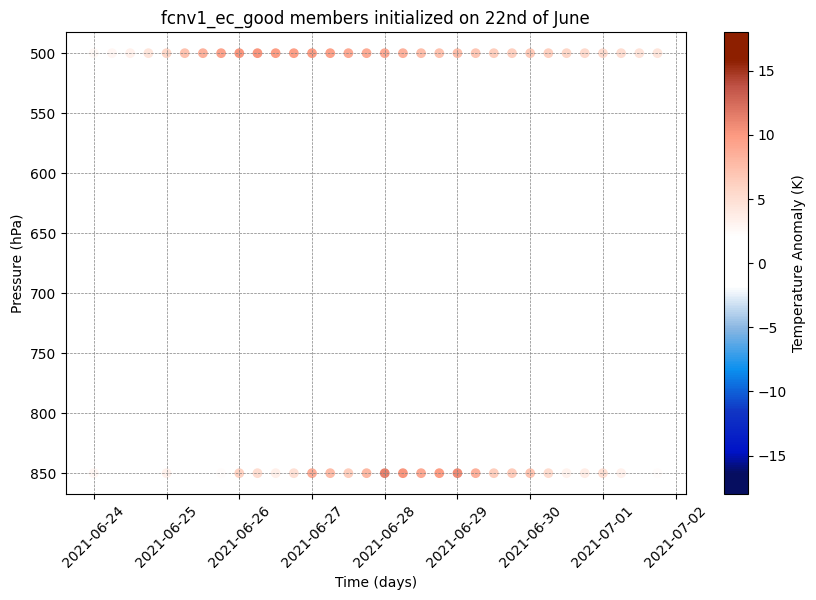

In [29]:
plot_temperature_anomaly(ds_fcnv1_ec_0622_ens_gm_mean[:,:],'fcnv1_ec_good members initialized on 22nd of June',time_data_array_0622[8:40])

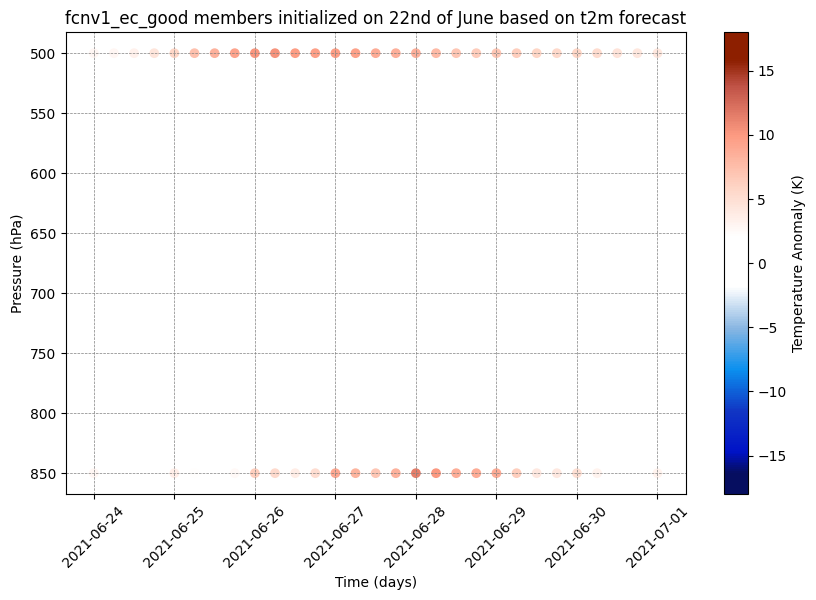

In [59]:
plot_temperature_anomaly(ds_fcnv1_ec_0622_ens_gm_mean_t2m_range[:,:],'fcnv1_ec_good members initialized on 22nd of June based on t2m forecast',time_data_array_0622[8:37])

In [58]:
ds_fcnv1_ec_0622_ens_gm_mean_t2m_range

<xarray.DataArray (plev: 2, phony_dim_1: 29)>
array([[ 2.8192087 ,  2.93555269,  3.33856505,  4.44708162,  5.80341741,
         7.36661837,  8.38639261,  9.31067506, 10.16524065, 10.28557974,
         9.80147443,  9.63419817,  9.74577828,  9.46338315,  8.76798999,
         8.55767861,  8.50348663,  7.84928168,  6.92434499,  6.53967839,
         6.98784322,  6.4460214 ,  5.82815049,  5.59280774,  5.82985528,
         5.30547453,  4.62603036,  4.27825938,  4.29532881],
       [ 2.84829274,  1.7840202 ,  0.608915  ,  1.56079446,  3.53556981,
         2.17222631,  0.74624872,  2.56049163,  6.45934899,  5.43946231,
         3.68240844,  5.15188614,  9.01820954,  8.16588334,  6.8961965 ,
         8.31241828, 11.45570824, 10.11534124,  8.63478814,  8.85533931,
         8.79894924,  6.38361675,  4.15991863,  4.16890067,  5.0332648 ,
         3.21208702,  1.23972356,  1.73189944,  3.12780773]])
Coordinates:
    phony_dim_2  (plev) int64 15 5
  * phony_dim_1  (phony_dim_1) int64 8 9 10 11 12 13 14 ... 30 31 32 33 34 35 36
  * plev         (plev) float64 5e+04 8.5e+04

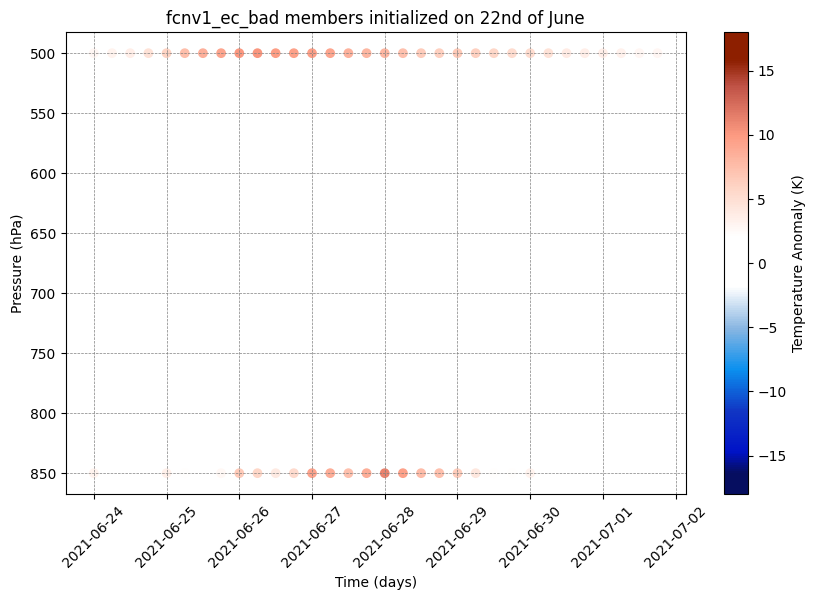

In [30]:
plot_temperature_anomaly(ds_fcnv1_ec_0622_ens_bm_mean[:,:],'fcnv1_ec_bad members initialized on 22nd of June',time_data_array_0622[8:40])

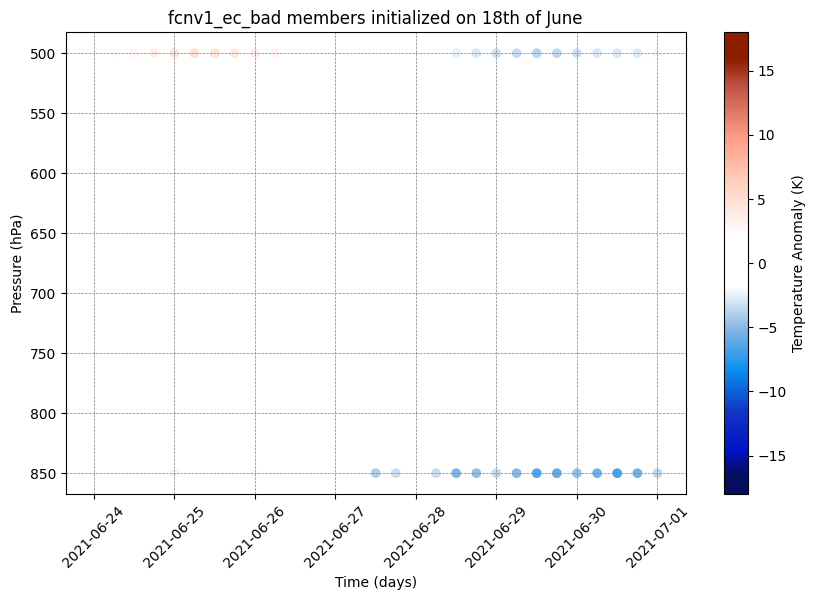

In [31]:
plot_temperature_anomaly(ds_fcnv1_ec_0618_ens_bm_mean[:,:],'fcnv1_ec_bad members initialized on 18th of June',time_data_array_0618[24:53])

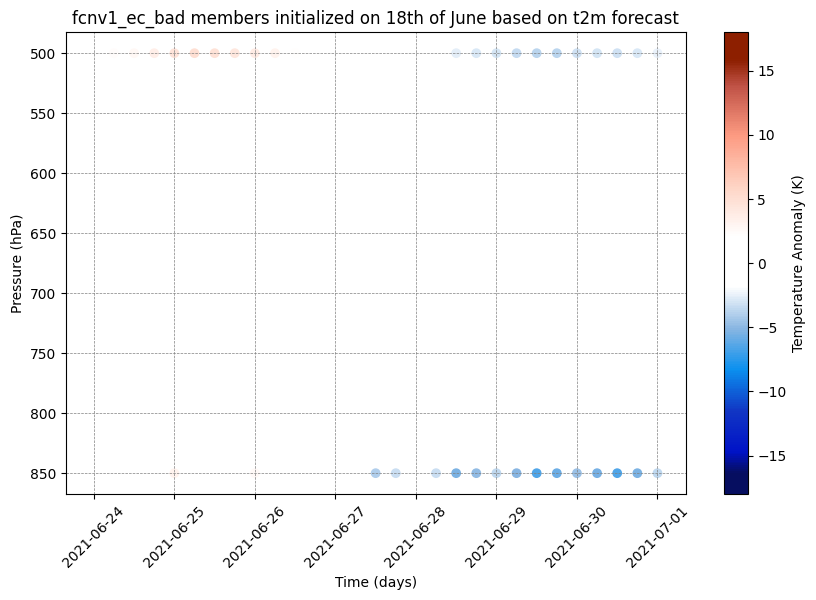

In [60]:
plot_temperature_anomaly(ds_fcnv1_ec_0618_ens_bm_mean_t2m_range[:,:],'fcnv1_ec_bad members initialized on 18th of June based on t2m forecast',time_data_array_0618[24:53])

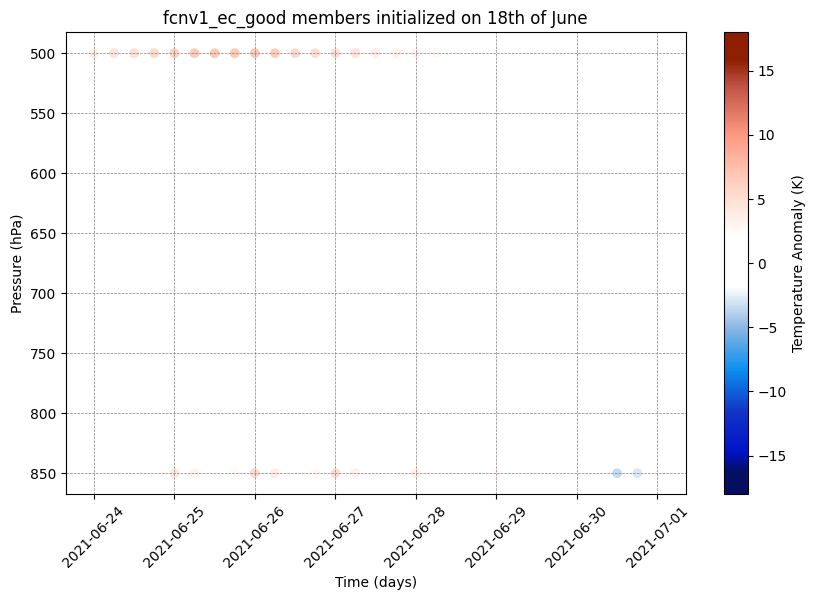

In [32]:
plot_temperature_anomaly(ds_fcnv1_ec_0618_ens_gm_mean[:,:],'fcnv1_ec_good members initialized on 18th of June',time_data_array_0618[24:53])

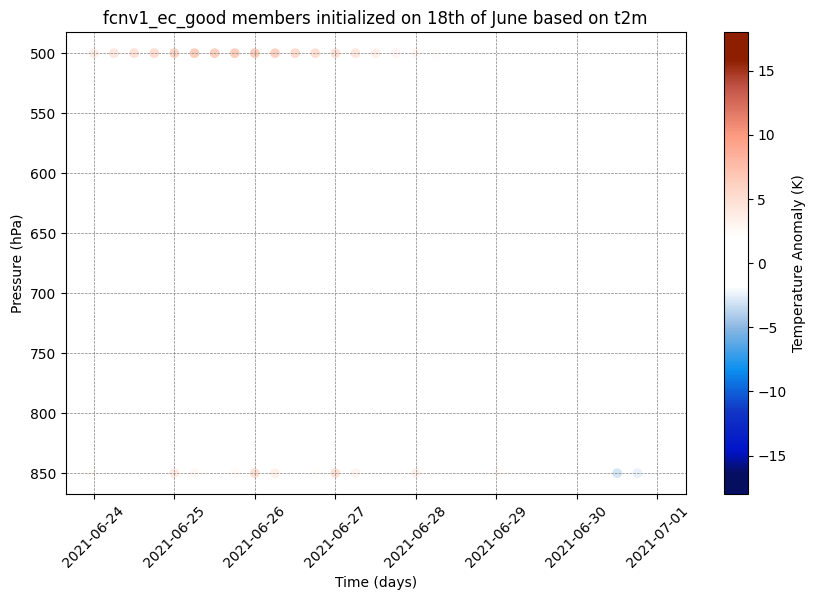

In [61]:
plot_temperature_anomaly(ds_fcnv1_ec_0618_ens_gm_mean_t2m_range[:,:],'fcnv1_ec_good members initialized on 18th of June based on t2m',time_data_array_0618[24:53])

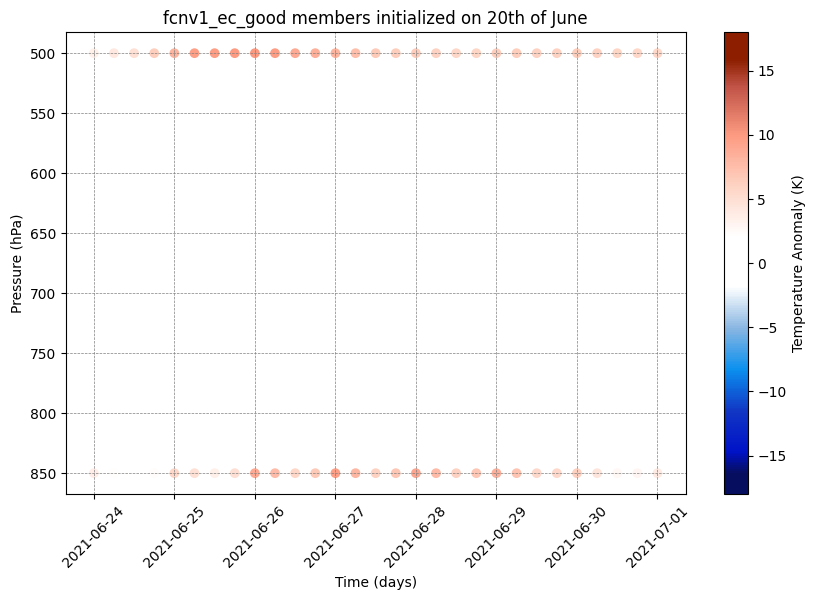

In [33]:
plot_temperature_anomaly(ds_fcnv1_ec_0620_ens_gm_mean[:,:],'fcnv1_ec_good members initialized on 20th of June',time_data_array_0620[16:45])

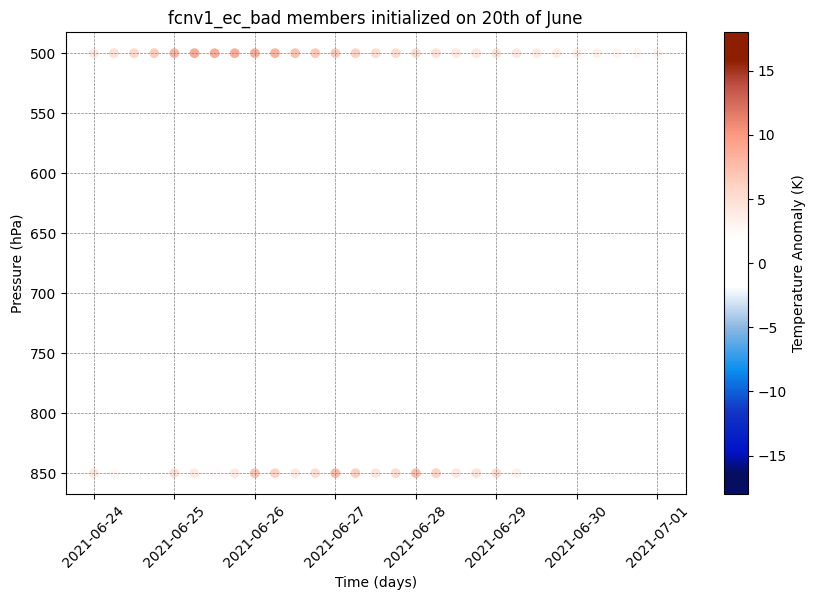

In [34]:
plot_temperature_anomaly(ds_fcnv1_ec_0620_ens_bm_mean[:,:],'fcnv1_ec_bad members initialized on 20th of June',time_data_array_0620[16:45])

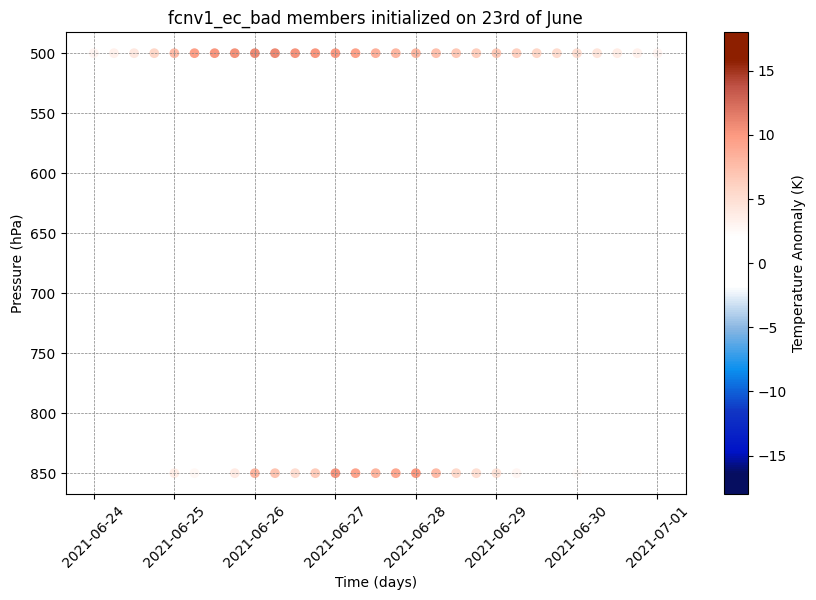

In [35]:
plot_temperature_anomaly(ds_fcnv1_ec_0623_ens_bm_mean[:,:],'fcnv1_ec_bad members initialized on 23rd of June',time_data_array_0623[4:33])

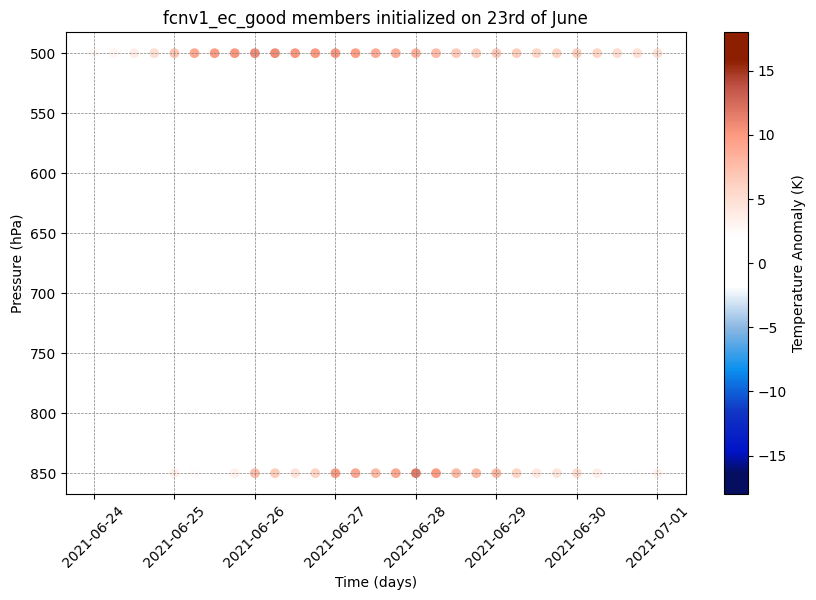

In [36]:
plot_temperature_anomaly(ds_fcnv1_ec_0623_ens_gm_mean[:,:],'fcnv1_ec_good members initialized on 23rd of June',time_data_array_0623[4:33])

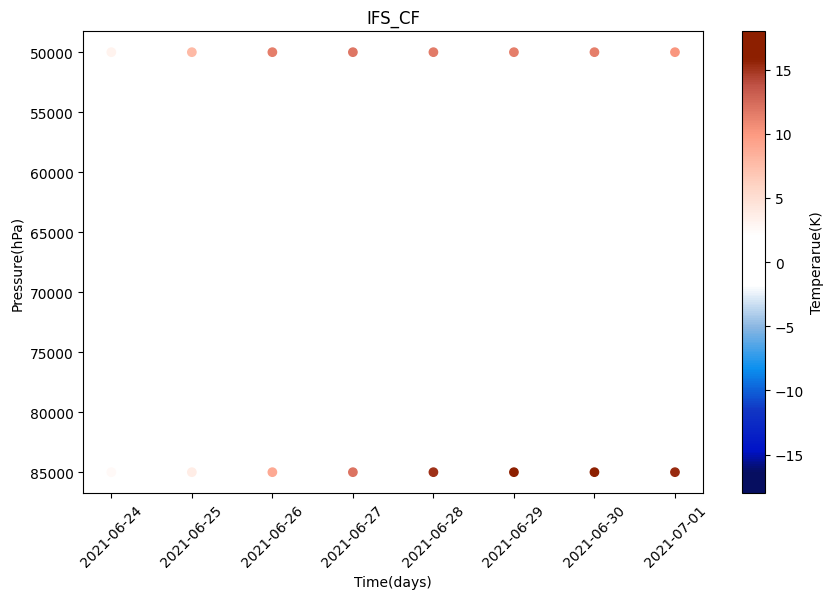

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times =ds_anom_era5_L2_lanbox_mean.time # datetime array
levels =ds_fcnv1_ec_0618_ens_gm_mean.plev  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anom_era5_L2_lanbox_mean.T# Adjust Z as per your data

#c = ax.contourf(X,Y,Z,cmap=shifted_cmap, levels=np.linspace(-18, 18, 19), extend='both')
c = ax.scatter(X,Y,c = Z,cmap=shifted_cmap,vmin=-18, vmax=18)
# Add color bar
fig.colorbar(c, ax=ax, label='Temperarue(K)')

# Set x-axis major locator and formatter for dates
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('IFS_CF')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
#plt.clabel(c, inline=True, fontsize=10, fmt='%1.1f')
plt.show()

In [40]:
X, Y

(array([[ 48,  54,  60,  66,  72,  78,  84,  90,  96, 102, 108, 114, 120,
         126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198,
         204, 210, 216, 222, 228, 234],
        [ 48,  54,  60,  66,  72,  78,  84,  90,  96, 102, 108, 114, 120,
         126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198,
         204, 210, 216, 222, 228, 234]]),
 array([[50000., 50000., 50000., 50000., 50000., 50000., 50000., 50000.,
         50000., 50000., 50000., 50000., 50000., 50000., 50000., 50000.,
         50000., 50000., 50000., 50000., 50000., 50000., 50000., 50000.,
         50000., 50000., 50000., 50000., 50000., 50000., 50000., 50000.],
        [85000., 85000., 85000., 85000., 85000., 85000., 85000., 85000.,
         85000., 85000., 85000., 85000., 85000., 85000., 85000., 85000.,
         85000., 85000., 85000., 85000., 85000., 85000., 85000., 85000.,
         85000., 85000., 85000., 85000., 85000., 85000., 85000., 85000.]]))